### Importing the required libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

### Synthetic data generation

In [35]:
X,y=make_classification(200, 2, shuffle=True, n_redundant=0, n_classes=2)

### Printing the shape and making a dataframe

In [36]:
print(X.shape)
print(y.shape)
data=pd.DataFrame(data=X,columns=['x1','x2'])
data['y']=y
data

(200, 2)
(200,)


,x1,x2,y
0,0.793503,1.450951,1
1,1.040914,0.276986,0
2,0.852074,0.879486,1
3,1.375618,-1.049736,1
4,1.478016,1.095887,1
...,...,...,...
195,-3.190290,2.112151,0
196,0.434181,0.766931,0
197,-0.619929,-0.043078,0
198,1.416421,-0.624472,1


### Making the graph for the given data

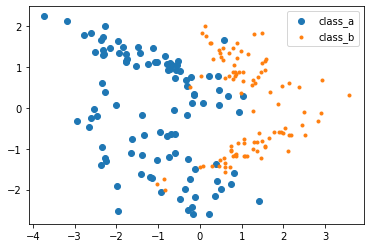

In [37]:
class_a=data[data.iloc[:,-1] == 0]
class_b=data[data.iloc[:,-1] == 1]
plt.scatter(np.array(class_a.iloc[:,0]), np.array(class_a.iloc[:,1]), marker="o", label='class_a')
plt.scatter(np.array(class_b.iloc[:,0]), np.array(class_b.iloc[:,1]), marker=".", label='class_b')
plt.legend()
plt.show()

### Dividing x and y axis

In [38]:
X=data.drop("y",axis=1)
y=data["y"]
X

,x1,x2
0,0.793503,1.450951
1,1.040914,0.276986
2,0.852074,0.879486
3,1.375618,-1.049736
4,1.478016,1.095887
...,...,...
195,-3.190290,2.112151
196,0.434181,0.766931
197,-0.619929,-0.043078
198,1.416421,-0.624472


In [39]:
y

0      1
1      0
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    1
199    1
Name: y, Length: 200, dtype: int32

### Making training and testing data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Using NaiveBaye's algorithm to train the model

In [41]:
naive=GaussianNB()
naive.fit(X_train,y_train)

GaussianNB()

### Predict using the given model

In [42]:
predict=naive.predict(X_test)

### Print the accuracy

In [43]:
print(classification_report(y_test,predict))
print("Accuracy is: ",accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Accuracy is:  0.85


#### Accuracy is 85%

### Using K-cross validation with NaiveBaye's classification

In [44]:
cvnaive = GaussianNB()
cv_scores=cross_val_score(cvnaive,X,y,cv=10)
print('Cross validation score is: ',cv_scores)
print('Average cross validation score: ',np.mean(cv_scores))

Cross validation score is:  [0.85 0.85 0.9  0.85 0.85 0.9  0.85 0.95 0.9  0.85]
Average cross validation score:  0.875


#### Accuracy is 87.5% which is better than Normal approach of NaiveBaye's classification

## Ensemble stacking

### - Using K-cross validation for KNN algorithm with k values starting from 3 to 10 

3 th cross validation
Cross validation score is:  [0.92537313 0.94029851 0.92424242]
Average cross validation score:  0.9299713553444896
4 th cross validation
Cross validation score is:  [0.94 0.9  0.96 0.9 ]
Average cross validation score:  0.9249999999999999
5 th cross validation
Cross validation score is:  [0.95  0.875 0.975 0.95  0.9  ]
Average cross validation score:  0.93
6 th cross validation
Cross validation score is:  [0.94117647 0.85294118 0.96969697 0.93939394 0.93939394 0.96969697]
Average cross validation score:  0.9353832442067737
7 th cross validation
Cross validation score is:  [0.93103448 0.96551724 0.93103448 0.96551724 0.92857143 0.92857143
 0.96428571]
Average cross validation score:  0.944933145672062
8 th cross validation
Cross validation score is:  [0.92 0.96 0.8  0.96 0.92 1.   0.92 0.96]
Average cross validation score:  0.9299999999999999
9 th cross validation
Cross validation score is:  [0.91304348 0.95652174 0.77272727 1.         0.95454545 0.90909091
 0.9545

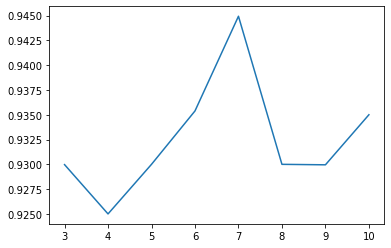

In [45]:
fold_list=[3,4,5,6,7,8,9,10]
accuracy_list=[]
for i in fold_list:
    print(i,"th cross validation")
    knncv=KNeighborsClassifier(n_neighbors=3)
    cv_scores=cross_val_score(knncv,X,y,cv=i)
    print('Cross validation score is: ',cv_scores)
    print('Average cross validation score: ',np.mean(cv_scores))
    accuracy_list.append(np.mean(cv_scores))
plt.plot(fold_list,accuracy_list)

#### The accuracy revolves around 92-94.5% with maximum accuracy as 94.5% where k=7 which is way better than Naive Baye's algorithm

### - Using K-cross validation for NaiveBaye's algorithm with k values starting from 3 to 10 

3 th cross validation
Cross validation score is:  [0.88059701 0.85074627 0.92424242]
Average cross validation score:  0.8851952359415046
4 th cross validation
Cross validation score is:  [0.9  0.84 0.88 0.92]
Average cross validation score:  0.885
5 th cross validation
Cross validation score is:  [0.875 0.9   0.875 0.9   0.875]
Average cross validation score:  0.885
6 th cross validation
Cross validation score is:  [0.82352941 0.91176471 0.87878788 0.87878788 0.87878788 0.90909091]
Average cross validation score:  0.8801247771836008
7 th cross validation
Cross validation score is:  [0.86206897 0.89655172 0.82758621 0.89655172 0.82142857 0.92857143
 0.92857143]
Average cross validation score:  0.8801900070372978
8 th cross validation
Cross validation score is:  [0.84 0.92 0.84 0.84 0.88 0.88 0.92 0.92]
Average cross validation score:  0.88
9 th cross validation
Cross validation score is:  [0.82608696 0.91304348 0.86363636 0.86363636 0.90909091 0.81818182
 0.95454545 0.86363636 0.8636363

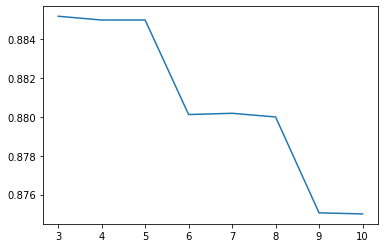

In [46]:
fold_list=[3,4,5,6,7,8,9,10]
accuracy_list=[]
for i in fold_list:
    print(i,"th cross validation")
    naivecv=GaussianNB()
    cv_scores=cross_val_score(naivecv,X,y,cv=i)
    print('Cross validation score is: ',cv_scores)
    print('Average cross validation score: ',np.mean(cv_scores))
    accuracy_list.append(np.mean(cv_scores))
plt.plot(fold_list,accuracy_list)

#### The accuracy revolves around 87.6-88.6% with maximum accuracy as 88.6 at k=3 which is better than normal approach of NaiveBaye's algorithm

### - Stacking with KNN, GNB and LR

In [47]:
estimators = [('knn',KNeighborsClassifier(n_neighbors=3)), ('gnb',GaussianNB())]

In [48]:
knn=KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()

In [49]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

3 th cross validation
Cross validation score is:  [0.92537313 0.95522388 0.90909091]
Average cross validation score:  0.9298959746720942
4 th cross validation
Cross validation score is:  [0.94 0.9  0.96 0.9 ]
Average cross validation score:  0.9249999999999999
5 th cross validation
Cross validation score is:  [0.95  0.9   0.975 0.95  0.9  ]
Average cross validation score:  0.9350000000000002
6 th cross validation
Cross validation score is:  [0.94117647 0.88235294 0.96969697 0.93939394 0.87878788 0.93939394]
Average cross validation score:  0.9251336898395722
7 th cross validation
Cross validation score is:  [0.93103448 0.96551724 0.93103448 0.96551724 0.92857143 0.89285714
 0.92857143]
Average cross validation score:  0.934729064039409
8 th cross validation
Cross validation score is:  [0.92 0.96 0.84 0.96 0.92 1.   0.88 0.92]
Average cross validation score:  0.9249999999999999
9 th cross validation
Cross validation score is:  [0.91304348 0.95652174 0.81818182 1.         0.95454545 0.90

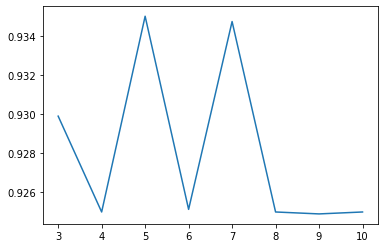

In [50]:
fold_list=[3,4,5,6,7,8,9,10]
accuracy_list=[]
for i in fold_list:
    print(i,"th cross validation")
    cv_scores=cross_val_score(clf,X,y,cv=i)
    print('Cross validation score is: ',cv_scores)
    print('Average cross validation score: ',np.mean(cv_scores))
    accuracy_list.append(np.mean(cv_scores))
plt.plot(fold_list,accuracy_list)

#### The accuracy revolves around 92.6% to 93.5% when stacking with all the three algorithm